<a href="https://colab.research.google.com/github/RheyMartt/CCMACLRL_EXERCISE_COM222ML/blob/main/Exercise8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 8: Create your own personal face recognition using SVM

## Instructions:

Create a directory in your google drive using this folder structure

```
My Drive
- Images
  - Train
    - Elizer
    - Eliza
  - Test
```

- Upload 30 images of your self (selfied are recommended) in the Train folder
- Upload 30 images of your partner in the Train folder
- Upload 10 images of yourself and your partner in the Test Folder
- Use **.png** or **.jpg** or **.jpeg** images files

In [125]:
pip install numpy opencv-python scikit-learn

## Import libraries

In [126]:
import os
import cv2
import numpy as np
from PIL import Image  # PIL is used to load the image
import matplotlib.pyplot as plt

## Mount Google Drive

In [127]:
from google.colab import drive
drive.mount('/content/EMEGES')

Drive already mounted at /content/EMEGES; to attempt to forcibly remount, call drive.mount("/content/EMEGES", force_remount=True).


## Display one raw image directly from your drive

In [128]:
def displayImage(image_path):
  image = Image.open(image_path)
  plt.imshow(image)
  plt.axis('on')
  plt.show()



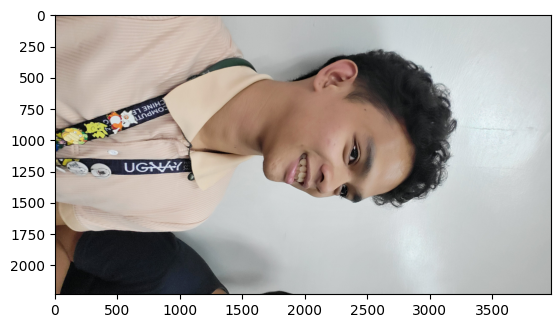

In [129]:
displayImage('/content/EMEGES/MyDrive/EMEGES/Train/ME/20241011_150929.jpg')

## Load the images from your drive and apply preprocessing to your raw images

In [130]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, person in enumerate(os.listdir(folder)):
        person_folder = os.path.join(folder, person)
        person_name = os.path.basename(person_folder)
        for filename in os.listdir(person_folder):
            img_path = os.path.join(person_folder, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels
            images.append(img.flatten())  # Flatten the image
            labels.append(person_name)
    return np.array(images), np.array(labels)

In [131]:
images, labels = load_images_from_folder('/content/EMEGES/MyDrive/EMEGES/Train')

In [132]:
images.shape

(211, 10000)

In [133]:
labels.shape

(211,)

In [134]:
labels

array(['ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME',
       'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME',
       'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME',
       'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME',
       'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME',
       'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'ME', 'Danyssa',
       'Danyssa', 'Danyssa', 'Danyssa', 'Danyssa', 'Danyssa', 'Danyssa',
       'Danyssa', 'Danyssa', 'Danyssa', 'Danyssa', 'Danyssa', 'Danyssa',
       'Danyssa', 'Danyssa', 'Danyssa', 'Danyssa', 'Danyssa', 'Danyssa',
       'Danyssa', 'Danyssa', 'Danyssa', 'Danyssa', 'Danyssa', 'Danyssa',
       'Danyssa', 'Danyssa', 'Danyssa', 'Danyssa', 'Danyssa', 'Danyssa',
       'Danyssa', 'Danyssa', 'Danyssa', 'Danyssa', 'Danyssa', 'Danyssa',
       'Danyssa', 'Danyssa', 'Danyssa', 'Danyssa', 'Danyssa', 'Danyssa',
       'Danyssa', 'Danyssa', 'Danyssa', 'Danyssa', 'Danyss

## Display one pre-processed image from the training set

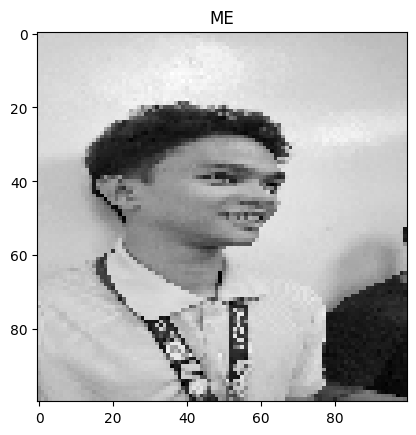

In [135]:
image = images[0].reshape(100, 100)
name = labels[0]

plt.imshow(image, cmap='gray')
plt.title(name)
plt.axis('on')
plt.show()

## Display ten pre-processed images from the training set

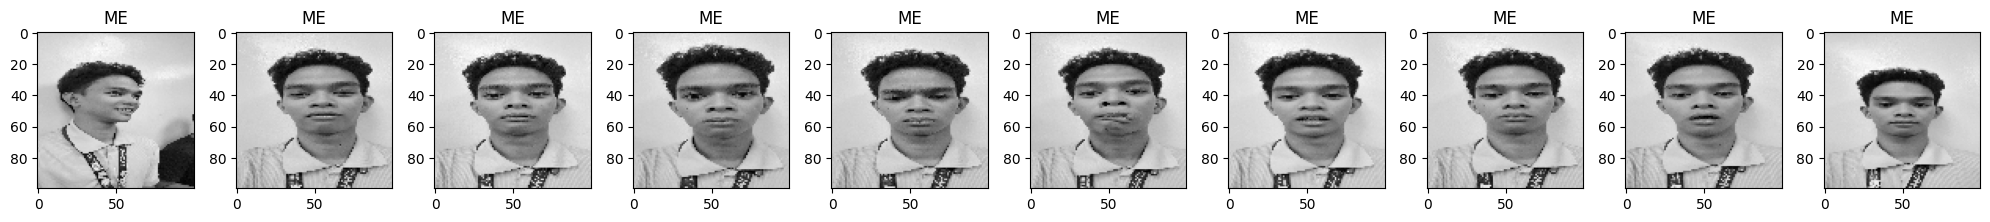

In [136]:
num_faces = 10

fig, axes = plt.subplots(1, num_faces, figsize=(20, 20))
axes = axes.flatten()

for i in range(num_faces):
    image = images[i].reshape(100, 100)
    name = labels[i]
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(name)
    axes[i].axis('on')

plt.tight_layout()
plt.show()

## Split your data

In [137]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

## Train your SVM model

In [138]:
from sklearn import svm

model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

## Evaluate your model

In [139]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'"Accuracy:", {accuracy * 100:.2f}%')

"Accuracy:", 95.35%


## Test your model using images not in your training set

Test one image of yourself

In [140]:
def predict_image(image_path, model):
  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, (100, 100)).flatten()
  img = img.reshape(1, -1)
  prediction = model.predict(img)
  return prediction

Prediction: ME


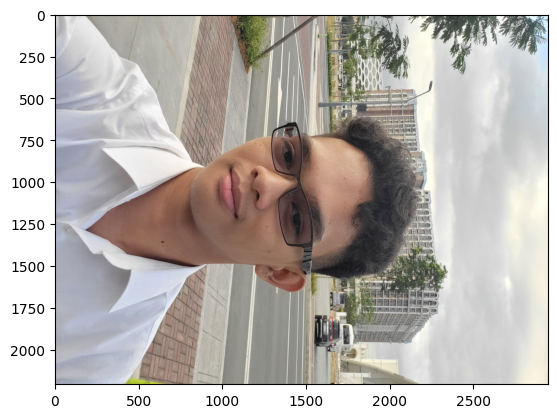

In [141]:
img_path = '/content/EMEGES/MyDrive/EMEGES/Test/20240214_165554.jpg'
prediction = predict_image(img_path, model)
print(f'Prediction: {prediction[0]}')
displayImage(img_path)

Test one image of your partner

Prediction: Danyssa


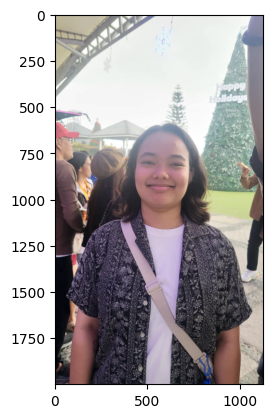

In [142]:
img_path = '/content/EMEGES/MyDrive/EMEGES/Test/Messenger_creation_9A7C9F3B-9C70-40CD-9A29-57FC5EB419D1.jpeg'
prediction = predict_image(img_path, model)
print(f'Prediction: {prediction[0]}')
displayImage(img_path)

Prediction: Rodney


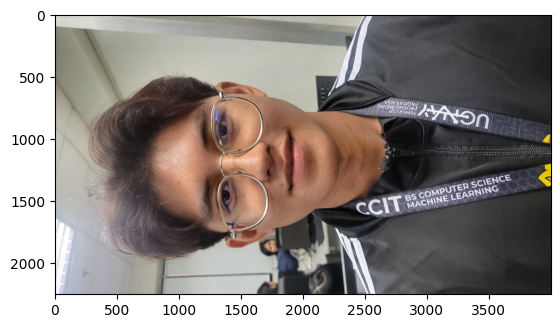

In [143]:
img_path = '/content/EMEGES/MyDrive/EMEGES/Test/20241011_173944.jpg'
prediction = predict_image(img_path, model)
print(f'Prediction: {prediction[0]}')
displayImage(img_path)